# Lecture 16 - Advanced Plotting II
Aidan Hunt, University of Washington

***

## Learning Objectives
After this lessons, students will be able to:
- Identify various types of plots that can be created using Matplotlib
- Create grid points using `np.meshgrid`
- Plot 3D data using `pcolormesh` and adjust limits and shading
- Customize plot labels, ticks, limits, grids, and


## Check-in
- HW6 pseudocode due Friday
***

## Recap from Last Time

- Everything in Matplotlib is an object!
    - Artists: containers (like `Figures` and `Axes`) and primitives (like `Line2D`)
    - When we customize our objects, we are changing their properties.
    - Lots of ways to do the same thing.
- Multiple ways to create plots
    - "Implicit Interface": Use `pyplot` only, objects are hidden
    - "Explicit Interface": Use `plt.subplots()` and interact with the resulting `Figure` and `Axes` objects
    - Recommend that you get familiar with the **explicit interface**

***
## All the ways we can plot
   
Have some data but not sure what the best to visualize it is? \
Or know what kind of plot you want, but not sure how to code it up?

Check out these resources:
- __[Matplotlib Plot types](https://matplotlib.org/stable/plot_types/index.html)__
- __[Matplotlib Cheat sheets](https://matplotlib.org/cheatsheets/)__

***
## Example problem

### Target plot

Let's produce the following plot:
- **Note**: If you are looking at this Jupyter Notebook as a .ipynb, don't spoil the answer code for yourself! Read ahead to see how we put it together.

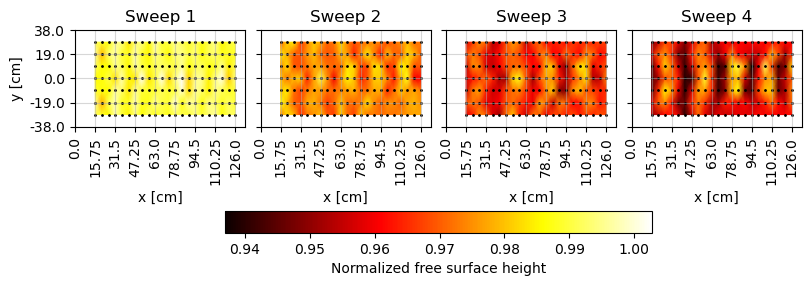

In [209]:
# (Code removed)

### The data
- See `freeSurface.txt` data posted on the course website.
    - Each row is a 7x22 grid of points, reshaped as a vector in MATLAB
- Grid of free-surface measurements in the wake of a turbine
- Sampled downstream of the turbine from D/2 to 4D in increments of D/6 (where D is the turbine diameter)
- Sampled crosstream from -3w/8 to 3w/8 in increments of w/8 (where w is the flume width)

***
## Pseudocode

Like before, we can get an idea of how to create this figure via pseudocode. Let's break the figure down into its components:

- Figures and axes
    - 1 figure with 4 axes
    - Probably want to use `plt.subplots()` for this with a constrained layout to make sure everything works out

- In each plot
    - Layer of color data is plotted
    - Black dots are plotted on top
    
- Labels
    - Each axis has an x label and a title
    - Only the leftmost y axis has a y label
    
- Color (we're not sure exactly how to do this, so save for last)
    - Some kind of yellow-red color scheme
    - Color is synchronized across all plots
    - Colorbar that matches data
    
We could potentially break things down more, but this is a good start. But one other important step we should consider is:

- Importing the data
    - Reshape each vector into a grid of the appropriate size

### Importing the data
Let's take a look at the imported data:

In [1]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Load data
fstData = np.loadtxt('freeSurface.txt', delimiter=',')
fstData.shape

(154, 4)

The data is a 154x4 matrix, where 154=7\*22.

While this 2D matrix is easy to store in a .txt file, we'd like to reshape it into a format that reflects our target plot. Based on the output, we want four 7x22 matrix, so let's aim for a 7x22x4 array
**Important note**:
- This data came from MATLAB and was shaped into a vector using MATLAB's order for reshaping matrices into vectors (by rows vs by columns)
- This protocol is different than Python's reshaping order. 
- For compatabiltiy, have to specify `order='F'` to use MATLAB's reshaping order.

In [2]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Load data
fstData = np.loadtxt('freeSurface.txt', delimiter=',')
fstData = np.reshape(fstData, [7, 22, 4], order='F')

# Check shape
fstData.shape

(7, 22, 4)

### Creating the grid

Okay, so we have our data that represents the height at each sample location, but in order to plot, we also need to know our sample locations. Let's make a grid based on what we know about the x and y locations that were sampled.

- Sampled downstream of the turbine from D/2 to 4D in increments of D/6 (where D is the turbine diameter)
- Sampled crosstream from -3w/8 to 3w/8 in increments of w/8 (where w is the flume width)

Idea:
- Create vectors of unique x and y values using `np.arange()`
- Use `np.meshgrid()` to generate grid arrays that represent all (X,Y) combinations that can be formed from those vectors.

In [3]:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Load data
fstData = np.loadtxt('freeSurface.txt', delimiter=',')
fstData = np.reshape(fstData, [7, 22, 4], order='F')

# Specify grid parameters
D = 31.5 # Turbine diameter, in cm
w = 78 # Flume width, in cm
dx = D/6 # Grid spacing in x, in cm
dy = w/8 # Grid spacing in y, in cm

# Create x and y vectors
x = np.arange(D/2, 4*D+dx, dx)
y = np.arange(-w/2+dy, w/2, dy)

# Create X and Y grids
X, Y = np.meshgrid(x, y)

In [4]:
print(x.shape)
print(X.shape)

(22,)
(7, 22)


In [5]:
print(y.shape)
print(Y.shape)

(7,)
(7, 22)


### Plotting the surface data

So what kind of plot should we use?
- This is 3D data. At each (X,Y), we have a Z value (the free surface height)
- So we want something for plotting an array
- `pcolormesh` seems most appropriate (and is what I used for the target plot)
    - Give x, y, and c (Z) arrays, and it plots them!

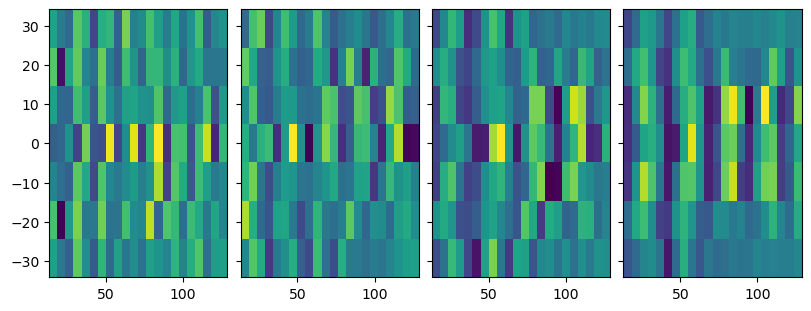

In [6]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    ax[i].pcolormesh(X, Y, fstData[:,:,i])

Uhhh, this looks okay, but how can we improve it?
- Obviously the color is wrong, but let's worry about that last.
- The aspect ratio doesn't seem quite right. In the target output, steps in x are the same size as steps in y
    - Let's set the aspect ratio to equal

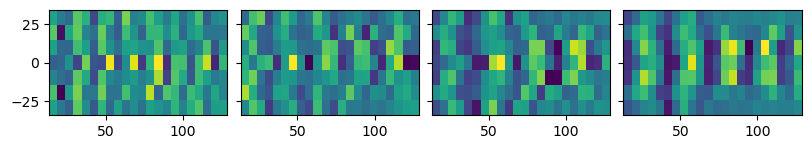

In [7]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    ax[i].pcolormesh(X, Y, fstData[:,:,i])
    ax[i].set_aspect('equal')

This looks better already! We can see some of the structure that was in the target output.

What else can we do?
- Synchronize color scale across the plots (so that max values and min values are consistent across all plots)
- Use `vmin` and `vmax` to set what the min and max values of the `pcolormesh` correspond to.

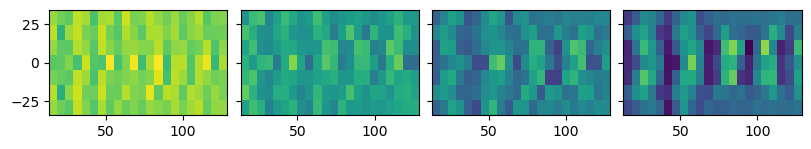

In [8]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    ax[i].pcolormesh(X, Y, fstData[:,:,i], vmin=np.min(fstData), vmax=np.max(fstData))
    ax[i].set_aspect('equal')

Awesome! Now, other than the color, the main difference is that these plots are quite a bit coarser than our target output.
- Each square represents a distinct sample point.
- What we want to do is interpolate between the sample points to yield a smoother picture.
- `pcolormesh` can do this for us! Let's specify the `shading` parameter as `'gouraud'`

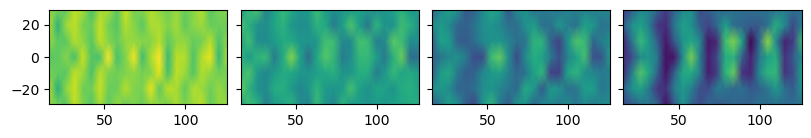

In [9]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    ax[i].set_aspect('equal')

This is looking great!

But as far as design goes, now this figure seems to be implying that everything we're showing is real data (really we are interpolating). So let's think about how to add the grid points, next.

### Plotting the grid points

We want to plot the grid **points** on this figure to show where we actually sampled.
- We want scattered data
- The `scatter` plotting function is a great fit here!

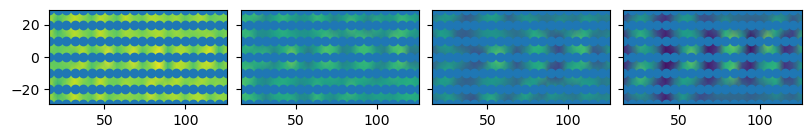

In [10]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')

Our points are too big and they are the wrong color. Let's review the parameters of the `scatter` method (see documentation) to customize
- `s`: Indicates size. Let's try setting to 4.
- `c`: Indicates color. Let's set to black `'k'`.

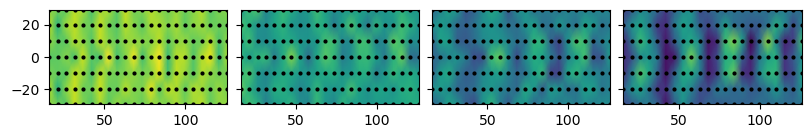

In [11]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')

That looks better. But now, comparing to our target output, what are the main differences?
- The color is still wrong (but we'll save that for last)
- The limits are not the same
- The ticks are not the same
- We're missing a grid

### Adjusting the labels, limits, ticks, and grid

At this point, our core data has been plotted. Now we're doing mostly formatting.

Let's do the labels first since that's the easiest.
- All axes get an x label (so let's do this inside the loop)
- All axes get a title (so let's do that in the loop, too)
- Only the first axes gets a y label (so let's do that outside the loop)

Text(0, 0.5, 'y [cm]')

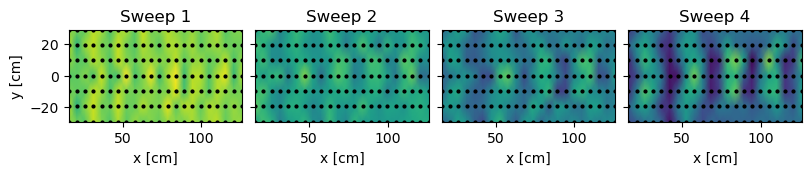

In [12]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))
    
# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

Now let's set the limits
- x limits are 0 to 4*D + D/6
- y limits are -w/2 to w/2

We could do this in the loop, but since our axes `sharex` and `sharey`, we can do it once outside and the limits will be synchronized.

(-39.0, 39.0)

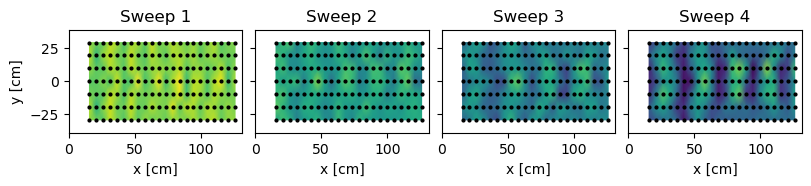

In [13]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

Ticks are not automatically synchronized, though, so we should do this in the loop:
- xticks are 0 to 4*D in increments of D/2
- yticks are -w/2 to w/2 in increments of w/4
- We can set the labels and rotation here, too!

(-39.0, 39.0)

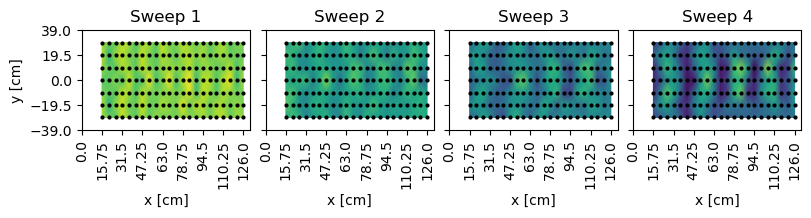

In [14]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)

# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

Finally let's turn on the grid!

(-39.0, 39.0)

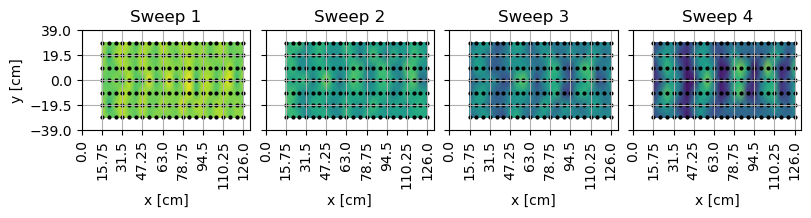

In [15]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)
    
    # Turn on the grid
    ax[i].grid()

# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

Uh...the grid is a bit bold. Remember our transparency parameter from last lecture: `alpha`

(-39.0, 39.0)

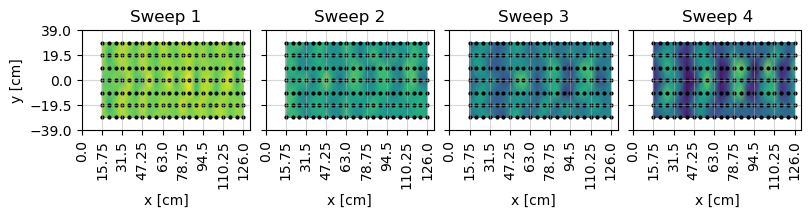

In [16]:
# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

xtickVals = np.arange(0, 4*D+D/2, D/2)
ytickVals = np.arange(-w/2, w/2+w/4, w/4)

# Plot on each axes
for i in range(nSweeps):
    # Plot the free surface data
    ax[i].pcolormesh(X, Y, fstData[:,:,i], 
                     vmin=np.min(fstData), vmax=np.max(fstData),
                     shading='gouraud')
    
    # Plot the grid points
    ax[i].scatter(X, Y, c='k', s=4)
    
    # Set aspect ratio
    ax[i].set_aspect('equal')
    
    # Set x label and title
    ax[i].set_xlabel('x [cm]')
    ax[i].set_title('Sweep ' + str(i+1))

    # Set x and y ticks
    ax[i].set_xticks(xtickVals, labels=xtickVals, rotation='vertical')
    ax[i].set_yticks(ytickVals)
    
    # Turn on the grid
    ax[i].grid(alpha=0.5)

# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Set x and y limits
ax[0].set_xlim([0, 4*D+dx])
ax[0].set_ylim([-w/2, w/2])

Alright! This looks perfect except for the color. Next lecture, we'll talk about changing the colormap and adding a colorbar.

***

***

In [ ]:
# Secret code for producing target output plot:
# imports
import numpy as np
import matplotlib.pyplot as plt

# Define 
D = 31.5 # Turbine diameter, in cm
w = 76   # Flume width, in cm
dx = D/6 # x grid spacing, in cm
dy = w/8 # y grid spacing, in cm

# Create vectors of x and y points
y = np.arange(-w/2+dy, w/2, dy)
x = np.arange(D/2, 4*D+dx, dx)

# Define our grid
X, Y = np.meshgrid(x, y)

# Load data
fstData = np.loadtxt('freeSurface.txt', delimiter=',')

# Reshape the data
fstData = np.reshape(fstData, [len(y), len(x), 4], order='F')

# Create our figure
nSweeps = 4
fig, ax = plt.subplots(nrows=1, ncols=nSweeps, sharex=True, sharey=True, layout='constrained', figsize=[8,3])

# For each sweep, plot!
for i in range(nSweeps):
    # Plot the data using pcolormesh
    mesh = ax[i].pcolormesh(X, Y, fstData[:,:,i], shading='gouraud', 
                            cmap='hot', vmin=np.min(fstData), vmax=np.max(fstData))
    
    # Plot the actual sample points using scatter
    ax[i].scatter(X, Y, marker='.', color='k', s=4)
    
    # Set limits of each plot
    ax[i].set_xlim(np.array([0, 4.25*D]))
    ax[i].set_ylim(np.array([-w/2, w/2]))
    
    # Set ticks of each plot
    xtickVals = np.arange(0, 4*D+D/2, D/2)
    ytickVals = np.arange(-w/2, w/2+w/4, w/4)
    ax[i].set_xticks(xtickVals)
    ax[i].set_yticks(ytickVals)
    
    # Set tick labels of each plot
    ax[i].set_xticklabels(xtickVals, rotation='vertical')
    ax[i].set_yticklabels(ytickVals)
    
    # Set title
    ax[i].set_title('Sweep ' + str(i+1))
    
    # Set grid and aspect ratio
    ax[i].grid(alpha=0.5)
    ax[i].set_aspect('equal')
    
    # Set x labels
    ax[i].set_xlabel('x [cm]')

# Set y label of leftmost axis only
ax[0].set_ylabel('y [cm]')

# Add a colorbar
fig.colorbar(mesh, ax=ax[:], location='bottom', label='Normalized free surface height')